# Part 1: Data Exploration and Preparation

#### Initialise library and settings

In [1]:
! pip install skimpy --quiet
! pip install pandas --quiet
! pip install pandas --quiet
! pip install matplotlib --quiet

In [2]:
from skimpy import generate_test_data, skim
import sqlite3
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

#### Import data

In [4]:
data = pd.read_excel(r"C:\Users\ZHangch4\OneDrive - EY\Desktop\Careers\Assignment\Data Insights - Synthetic Dataset.xlsx")

In [5]:
print(data.head())

  insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
0        EAQ       78773  2015-03-24     64012   F    2024-07-22   
1        YMX         325  1970-01-04     37800   F    2023-10-05   
2        RQU       44678  2020-01-08     31072   F    2024-02-02   
3        QCO       83603  1982-12-28     33340   F    2022-08-02   
4        EAQ       85397  2020-09-23     58698   M    2022-08-30   

  SeparationDate  AR-DRG ModeOfSeparation    CareType SourceOfReferral  \
0     2024-07-29    C63A            Other   Inpatient               GP   
1     2023-11-03    P05A            Other  Outpatient       Specialist   
2     2024-02-08    B03C         Transfer   Emergency               GP   
3     2022-08-27    B80A            Other   Inpatient       Specialist   
4     2022-09-07  DRG002         Transfer   Inpatient       Specialist   

  DischargeIntention  AdmissionProviderID AdmissionTime UrgencyOfAdmission  \
0               Home              9506672      02:11:14          Eme

In [6]:
# Initial EDA - datetime.time objects are not accepted so dropped temporarily
skim(data.drop(['SeparationTime', 'AdmissionTime'], axis=1))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30000  │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 35     │ │ float64     │ 9     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 4     │                                                          │
│                                │ datetime64  │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ episode_id   │     0 │     0 │   50030 │   28880 │      0 │   25130 │   49880 │   75090 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Postcode     │     0 │     0 │   50020 │   28630 │    504 │   25600 │   49760 │   74690 │   99950 │ ▇▇▇▇▇▇ │  │
│ │ AdmissionPro │     0 │     0 │ 5346000 │ 2809000 │ 500200 │ 2798000 │ 5939000 │ 7568000 │ 9925000 │ ▇▇▂▇▇▆ │  │
│ │ viderID      │       │       │         │         │        │         │         │         │         │        │  │
│ │ Accommodatio │     0 │     0 │   11.19 │   3.068 │  4.636 │   8.805 │   10.66 │   13.32 │   33.94 │  ▇▇▂   │  │
│ │ nCharge      │       │       │         │         │        │         │         │         │         │        │  │
│ │ CCU_Charges  │ 17167 │ 57.22 │   8.345 │   1.904 │  5.019 │   6.809 │   7.766 │    10.2 │   17.56 │  ▇▆▇▁  │  │
│ │ ICU_Charge   │ 17138 │ 57.13 │   9.839 │   2.602 │  5.709 │   7.697 │   9.513 │   11.59 │   29.96 │  ▇▆▁   │  │
│ │ TheatreCharg │ 17164 │ 57.21 │    1091 │   518.1 │  200.1 │   640.5 │    1085 │    1537 │    2000 │ ▇▇▇▇▇▇ │  │
│ │ e            │       │       │         │         │        │         │         │         │         │        │  │
│ │ ProsthesisCh │ 17151 │ 57.17 │     318 │   184.5 │  50.04 │   181.9 │   311.1 │   437.7 │    5392 │   ▇    │  │
│ │ arge         │       │       │         │         │        │         │         │         │         │        │  │
│ │ OtherCharges │ 17181 │ 57.27 │   112.8 │   54.12 │     20 │   65.96 │   112.9 │   158.6 │     240 │ ▇▇▇▇▇▁ │  │
│ │ BundledCharg │ 17106 │ 57.02 │    2725 │    1306 │  500.1 │    1596 │    2699 │    3868 │    5000 │ ▇▇▇▇▇▇ │  │
│ │ es           │       │       │         │         │        │         │         │         │         │        │  │
│ │ InfantWeight │ 28475 │ 94.92 │   3.751 │  0.7117 │    2.5 │    3.11 │    3.78 │    4.36 │       5 │ ▇▇▆▇▇▇ │  │
│ │ HoursMechVen │ 28531 │  95.1 │   36.67 │   21.15 │      0 │      19 │      37 │      55 │      72 │ ▇▇▇▇▇▇ │  │
│ │ tilation     │       │       │         │         │        │         │         │         │         │        │  │
│ │ Age          │     0 │     0 │   50.32 │   29.22 │      0 │      25 │      50 │      76 │     101 │ ▇▇▇▇▇▇ │  │
│ └──────────────┴───────┴───────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                    dat

Hypothesis 1: That age is not correctly coded, uncertain whether it is age at admission/separation or neither.

Finding: That there are instances where date of birth is > admission date. This is unlikely to be mother/newborn scenario as separation cause also includes palliative care.

In [7]:
# Function to calculate age as of the reference date
def calculate_age(row, event_col):
    dob = row['DateOfBirth']
    anchor_date = row[event_col]
    age = anchor_date.year - dob.year
    if (anchor_date.month, anchor_date.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to the 'date_of_birth' column to create a new 'age' column
data['DerivedSepAge'] = data.apply(calculate_age, axis=1, event_col = 'SeparationDate')
data['DerivedAdmitAge'] = data.apply(calculate_age, axis=1, event_col = 'AdmissionDate')
print(data[['Age','DerivedSepAge','DerivedAdmitAge']].head())

   Age  DerivedSepAge  DerivedAdmitAge
0    9              9                9
1   54             53               53
2    4              4                4
3   41             39               39
4    4              1                1


In [8]:
negative_age_df = data[data['DerivedAdmitAge'] < 0]
n_rows = negative_age_df.shape[0]
print(negative_age_df)
print(f"Total rows affected: {n_rows}")

      insurer_id  episode_id DateOfBirth  Postcode Sex AdmissionDate  \
73           YMX        1294  2023-11-29     64581   M    2023-07-19   
97           YMX       76416  2024-07-17      8650   F    2022-09-12   
200          EAQ       22522  2022-11-25     38157   M    2022-10-21   
438          RQU        4612  2023-02-20     95442   M    2022-08-11   
667          QCO        7870  2023-08-07     27894   F    2023-04-28   
...          ...         ...         ...       ...  ..           ...   
29554        RQU       29378  2024-01-21     46338   F    2023-01-20   
29737        YMX       75328  2023-05-18     12111   M    2022-09-16   
29766        RQU       70552  2023-03-08     43084   F    2022-08-25   
29864        EAQ       96739  2023-10-14     51002   M    2022-08-26   
29985        YMX       62747  2023-06-12     23134   M    2022-09-06   

      SeparationDate  AR-DRG ModeOfSeparation    CareType SourceOfReferral  \
73        2023-07-24  DRG003            Other  Outpatient

Hypothesis 2: That postcode is incorrectly coded

Finding: There is no way to group postcode, likely incorrect. Not zero right padded as there are non-zero right digits.

In [9]:
def calculate_unique(data_in, col_name):
    n_unique = data_in.groupby([col_name]).ngroups
    n_rows = data_in.shape[0]
    
    print(f"Number of unique combinations of {col_name} using groupby: {n_unique}")
    print(f"Number of total rows in data: {n_rows}") 

calculate_unique(data_in = data, col_name = "Postcode")

Number of unique combinations of Postcode using groupby: 25944
Number of total rows in data: 30000


#### Question 1: Data quality issues:
1. Australian postcode is a 4 digit number. In this dataset it is mostly 5 digits
2. Uncertainty on how Age is derived (patient information or derived using age at separation/admission)

##### Postcode
After a closer look, the postcode variable cannot be grouped in a meaningful way, forming 25,944 unique postcodes amongst 30,000 rows. To address the data quality in this variable:
1. Determine whether this variable is formed by user input or whether it is a derived variable from an automated process. If it is created by user input, either a new data source must be used or the existing source must be improved
2. If it is an automated input, the user needs to understand how it is derived. It is uncertain at this stage which 4 digits make up the postcode, or whether it is meant to represent a postcode at all - other possible uses could be that it is referring to Statistical Area level 3 (SA3).

There would be no data quality improvements until the above process is done.

##### Age
A check was applied to validate the accuracy of the Age variable. Regardless of whether it is meant to represent age at separation or admission, the derived age, taken to be date of separation/admission - date of birth, results in negative ages.

To address the data quality of the Age variable:
1. Determine whether the Age variable or the date of birth variable is more reliable.
2. Assuming that the date of birth variable would be cross-referenced with identification, assume DateOfBirth to be the source of truth.
3. Create a derived age variable by taking the date of separation/admission - date of birth.
4. For negative ages, a possible solution is to delete the affected rows (289 rows removed). 

#### Question 2: Feature Engineering for Financial Year

Rationale: Financial year is an important feature to consider when modelling insights as it allows for trend analysis, comparison to financial statements, and grouped analysis.

In [11]:
# Function to calculate the financial year
def get_financial_year(date):
    if date.month >= 7:
        # If the month is greater than or equal to the start month, it's the current year
        return date.year + 1
    else:
        # If the month is less than the start month, it's the previous year
        return date.year

# Apply the function to the 'date' column to create a new 'financial_year' column
data['FinancialYear'] = data['AdmissionDate'].apply(get_financial_year).astype(str)

print(data[['AdmissionDate','FinancialYear']])

      AdmissionDate FinancialYear
0        2024-07-22          2025
1        2023-10-05          2024
2        2024-02-02          2024
3        2022-08-02          2023
4        2022-08-30          2023
...             ...           ...
29995    2023-05-14          2023
29996    2023-03-09          2023
29997    2024-02-04          2024
29998    2023-09-24          2024
29999    2022-09-11          2023

[30000 rows x 2 columns]


# Part 2: Data Analysis and Visualisation

#### Data issues:
1. Pharmacy charge was identified as having a data quality issue by showing scientific notation. Upon further analysis, the data output is unreliable as the figures are extremely large and an unlikely result (e.g. to the scale of 10^110). The decision was to exclude this from analysis until data quality can be improved. This now forms a limitation of the analysis
2. AR-DRG 'DRG001,DRG002,DRG003' is in a different format to AR-DRG standards, reason unknown. They were not included in the selection for the top 10 AR-DRG codes as they may be groupings of DRGs or be a data quality issue. '961Z' was also excluded as it represents the ungroupable DRGs

In [13]:
# Identify the nature of the data quality issue - are there multiple numbers being added together?
data.loc[:,'plus_count'] = data['PharmacyCharge'].str.count(r'\+')
print(data[data['plus_count'] > 1])

Empty DataFrame
Columns: [insurer_id, episode_id, DateOfBirth, Postcode, Sex, AdmissionDate, SeparationDate, AR-DRG, ModeOfSeparation, CareType, SourceOfReferral, DischargeIntention, AdmissionProviderID, AdmissionTime, UrgencyOfAdmission, SeparationTime, PrincipalDiagnosis, Diagnosis2, Diagnosis3, Diagnosis4, Principal_ProcedureCode, ProcedureCode2, ProcedureCode3, AccommodationCharge, CCU_Charges, ICU_Charge, TheatreCharge, PharmacyCharge, ProsthesisCharge, OtherCharges, BundledCharges, UnplannedTheatreVisit, InfantWeight, Readmission28Days, HoursMechVentilation, PalliativeCareStatus, Age, DerivedSepAge, DerivedAdmitAge, FinancialYear, plus_count]
Index: []


In [14]:
# Summarise data. First identify the top AR-DRGs across the full dataset
cost_columns = ['CCU_Charges', 'ICU_Charge', 'TheatreCharge', 'ProsthesisCharge', 'OtherCharges', 'BundledCharges']

data2 = data.groupby(['AR-DRG'])[cost_columns].sum()
data2 = data2.assign(TotalCost=data2[cost_columns].sum(axis=1))
total_cost_by_drg = data2.groupby('AR-DRG')['TotalCost'].sum()
top_15_drgs = total_cost_by_drg.nlargest(15).index
print(top_15_drgs)


Index(['DRG002', 'DRG003', 'DRG001', 'L62C', 'I08B', 'C63B', 'Q02A', 'K11B',
       'Q62A', 'D65B', '961Z', 'U60Z', 'L67B', 'B07B', 'H05B'],
      dtype='object', name='AR-DRG')


In [16]:
# DRG001, DRG002, DRG003 do not follow the conventional AR-DRG format, reason unknown.
select_drg = ['L62C', 'I08B', 'C63B', 'Q02A', 'K11B',
       'Q62A', 'D65B', 'U60Z', 'L67B', 'G07A']
data3 = data.groupby(['FinancialYear','AR-DRG'])[cost_columns].sum()
data3 = data3.assign(TotalCost=data3[cost_columns].sum(axis=1))
data3 = data3.reset_index()
top_10_data = data3[data3['AR-DRG'].isin(select_drg)]
top_10_data = top_10_data[['FinancialYear','AR-DRG','TotalCost']]
top_10_pivot = top_10_data.pivot(index='FinancialYear', columns='AR-DRG', values='TotalCost')


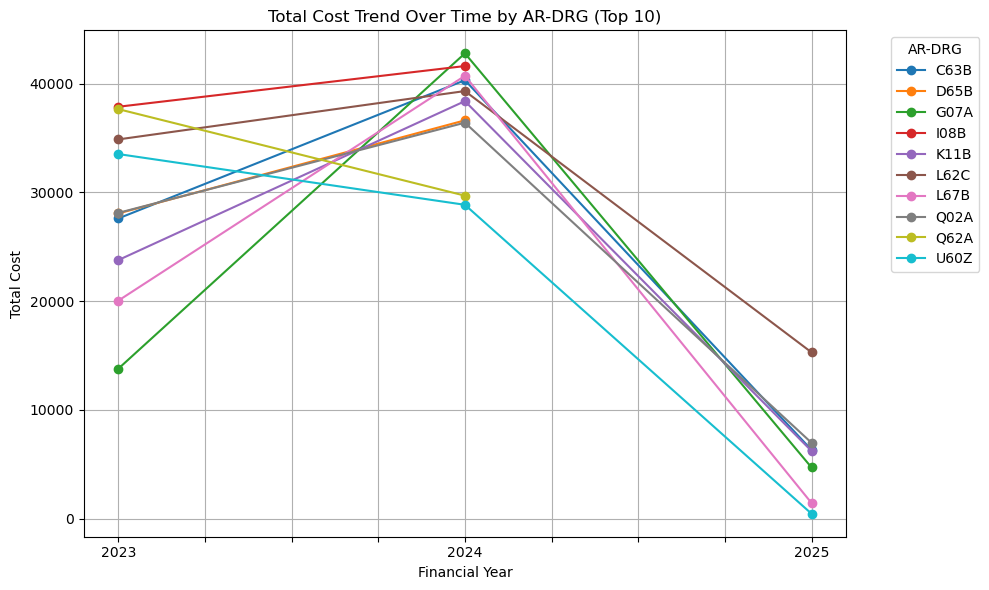

In [17]:
# Plot the trend of total cost over time for each of the top 10 AR-DRGs
top_10_pivot.plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Total Cost Trend Over Time by AR-DRG (Top 10)')
plt.xlabel('Financial Year')
plt.ylabel('Total Cost')
plt.grid(True)
plt.legend(title='AR-DRG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [18]:
# Filter for select DRGs in 2024
detail_drg = ['G07A','I08B','C63B','L67B']
detail_year = ['2024']
data4 = data3[data3['AR-DRG'].isin(detail_drg) & data3['FinancialYear'].isin(detail_year)]
data4 = data4.groupby(['AR-DRG'])[cost_columns].sum()

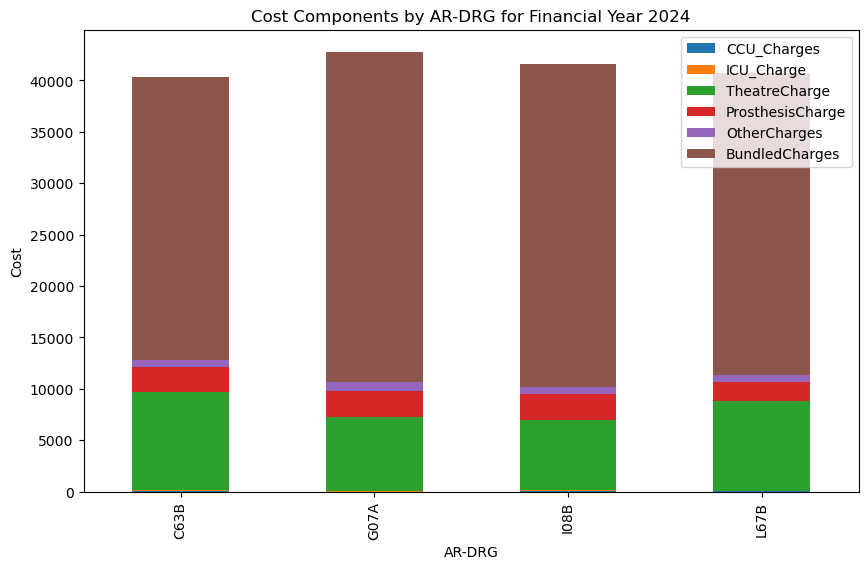

In [19]:
# Plotting the stacked bar chart
data4.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Cost Components by AR-DRG for Financial Year 2024')
plt.xlabel('AR-DRG')
plt.ylabel('Cost')

plt.show()

#### Question 3: DRGs with the largest charges
Across the whole dataset, 'G07A','I08B','C63B' acrrued the top 3 charges. The largest driver for these charges is through the bundled charges
FY2024 was used as the reference point as it is the most complete financial year in the data. 

#### Question 4: SQL

SELECT
    YEAR(AdmissionDate) as ADMITTED_YEAR
    MONTH(AdmissionDate) as ADMITTED_MONTH
    COUNT(episode_id) as TOTAL_ADMISSION
    SUM(CALCULATED TOTAL_ADMISSION)/24 as AVG_ADMISSION
FROM
    DB.DATA
WHERE
    AdmissionDate BETWEEN '01-07-2022'd AND '30-06-2024'd
GROUP BY
    ADMITTED_YEAR
    ,ADMITTED_MONTH
;

#### Question 5: SQL

SELECT
    PrincipalDiagnosis
    ,Sex
    ,percentile_cont(0.25) WITHIN GROUP (ORDER BY TotalCharges) AS "p_25"
    ,percentile_cont(0.5) WITHIN GROUP (ORDER BY TotalCharges) AS "p_50"
    ,percentile_cont(0.75) WITHIN GROUP (ORDER BY TotalCharges) AS "p_75"
    ,percentile_cont(0.75) WITHIN GROUP (ORDER BY TotalCharges) AS "p_90"
    ,percentile_cont(0.75) WITHIN GROUP (ORDER BY TotalCharges) AS "p_95"
FROM
    DB.Data
GROUP BY
    PrincipalDiagnosis
    ,Sex
ORDER BY
    PrincipalDiagnosis
    ,Sex
;

The result would show that 25% of ordered TotalCharges would be less than p_25. The next quartile would be between p_25 and p_50. p_90 and p_95 are useful in identifying large outliers in the model of extremely high TotalCharges.

# Part 4: Strategic Insights and Recommendations

Analysis to identify trends

In [21]:
# Calculate distribution for 'Sex'
dist0 = data['Sex'].value_counts()
print("\n Distribution:\n", dist0)

dist1 = data['ModeOfSeparation'].value_counts()
print("\n Distribution:\n", dist1)

dist2 = data['CareType'].value_counts()
print("\n Distribution:\n", dist2)

dist3 = data['SourceOfReferral'].value_counts()
print("\n Distribution:\n", dist3)

dist4 = data['UrgencyOfAdmission'].value_counts()
print("\n Distribution:\n", dist4)


 Distribution:
 Sex
F    15002
M    14998
Name: count, dtype: int64

 Distribution:
 ModeOfSeparation
Discharge    10137
Other         9964
Transfer      9899
Name: count, dtype: int64

 Distribution:
 CareType
Emergency     10133
Outpatient     9943
Inpatient      9924
Name: count, dtype: int64

 Distribution:
 SourceOfReferral
Self          10104
Specialist     9978
GP             9918
Name: count, dtype: int64

 Distribution:
 UrgencyOfAdmission
Urgent       10014
Emergency    10004
Elective      9982
Name: count, dtype: int64


Finding: That distribution of time admitted is uniform

In [22]:
# Identify hour of admittance
from datetime import datetime, timedelta, date

# Custom function to round time to the nearest hour
def round_to_nearest_hour(time_obj):
    # If minutes are 30 or more, or it's 29 minutes and 59 seconds, round up to the next hour
    if time_obj.minute >= 30:
        # Add one hour and reset minutes and seconds to zero
        full_hour = (datetime.combine(date.min, time_obj) + timedelta(hours=1)).time()
        return full_hour.hour
    else:
        return time_obj.hour

data['NearestHour'] = data['AdmissionTime'].apply(round_to_nearest_hour)

dist5 = data['NearestHour'].value_counts().sort_index()
print("\n Distribution:\n", dist5)


 Distribution:
 NearestHour
0     1276
1     1265
2     1264
3     1303
4     1227
5     1297
6     1218
7     1261
8     1237
9     1211
10    1292
11    1202
12    1275
13    1251
14    1221
15    1292
16    1198
17    1186
18    1255
19    1182
20    1246
21    1261
22    1310
23    1270
Name: count, dtype: int64


#### Question 6: Strategic insight

##### Patient Care:
Admission time into the hospital is uniformly distributed across all hours of the day. This suggests that to ensure consistency and quality of care, the hospitals should also be staffed uniformly across all hours of the day.

##### Hospital Operations:
The largest charge for these hospitals are bundled charges, which are intended to cover all charges relating to a specific episode of care. To improve hospital operations, one suggestion would be to ensure that the complexity of the procedures performed on bundled charges do not increase adversely  against the charge itself. This is because an increased caseload of higher complexity cases are likely to increase underlying costs and divert hospital resources away from other procedures. 

Whilst casemix cannot be easily controlled, it is important to monitor bundled charges so that they adequately reflect the diversity of the individual hospital casemix, as well as the casemix of Ramsay Hospitals as a group.

# Part 5: Model Development

#### Question 7: Modelling
##### Model purpose:
The predictive model would be used to predict the complexity of future AR-DRGs. It could be a classification problem (major, minor complexity) or the target variable can be continuous (like length of stay, cost). These insights can assist in the pricing of bundled costs, staffing, and improving patient care.

##### Model choice:
A regression model can be used to help Ramsay model future caseload complexity by breaking down the features into a linear and additive model whose results can be easily communicated to non-technical stakeholders. 

##### Processing steps:
1. Data Cleaning: For the proposed set of features, ensure that the data quality is fit for purpose2. Feature Engineeringg:Where data is not currently available, consider the creation of derived variables. E.g. Grouping categorical variables such as age into larger groups..3. Data Preparationng: Convert categorical variables into numerical form using one-hot encoding or target encoding4. .
Normalization/Standardization: Scale numerical features to ensure that no single feature dominates the model due to its sca l5. e.
Data Splitting: Split the dataset into training, validation, and test sets to train and evaluate the mod6. el.
Feature Selection: Use techniques forwards/backwards selection, statistical tests, regularisation, to select features that are important and make logical sense to be included in the model.

##### Evaluation metrics:
1. RMSE tests assist in determining the deviation from predicted to actual results for the training sample
2. R squared can be used to identify how much the volatility can be explained by the model in the training sample
3. Cross validation can be used to generalise the model and reduce its bias on the training data
ures.


#### Question 8: Deployment pipeline involves
##### Model sterilisation: 
Using libraries such as pickle on python to easily transmit the model into a production environment
##### Deployment: 
The sterilised model, including all dependencies, will be uploaded to a suitable platform such as a cloud platform
##### Monitoring: 
To monitor the model's performance, implement procedures to log key inputs, predictions, and system behaviour. This also includes defining thresholds to notify the team of issues that the model has identified, or issues with the model itself. Examples include:
   a. Monitoring the data quality of inputs that feed into the model, with predictions and timestamps.
   b. Monitoring the latency and throughput of the model, ensuring that there is a steady flow of data into and out of the model.
   c. Monitoring errors produced by the model, which may be an indicator of new data recording practices.
##### Retraining: 
The model should be retrained periodically to ensure that the features still represent the underlying data, and that the features are still important predictors. This step would involve repeating the process from 'Part 5 - Model Development'.

##### Potential issues should be handled:
1. In a timely manner, in a way that minimises the amount of disruption to operations
2. Communicating changes, which is important if the model is used by other teams
3. By narrowing down the source of the issue, captured by the monitoring process